## <b> Why Matplotlib? <b>
Built on NumPy arrays (and Python) <br>
Integrates directly with pandas <br>
Can create basic or advanced plot <br>
Simple to use interface (once you get the foundations) <br>

<img src="workflow.png"/>

## What I will be learning
Matplotlib workflow <br>
Importing Matplotilib and the 2 ways of plotting <br>
Plotting data from NumPy arrays<br>
Plotting data from pandas DataFrames<br>
Customizing plots<br>
Saving and shring plots

# Intorduction to Matplotlib

In [1]:
%matplotlib inline 

In [2]:
# Instructing jupyter notebook to display our plots within our notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
plt.plot()

[]

In [4]:
plt.plot(); #Removes that bracket

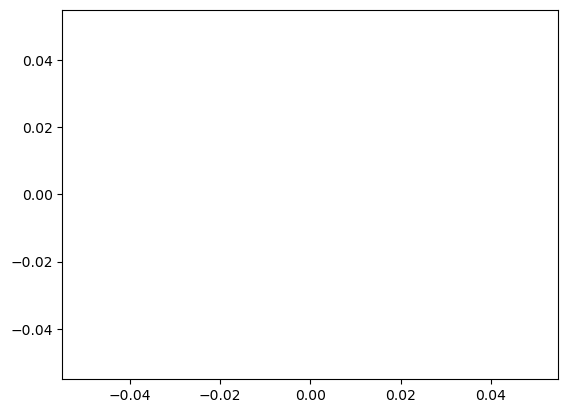

In [5]:
plt.show()

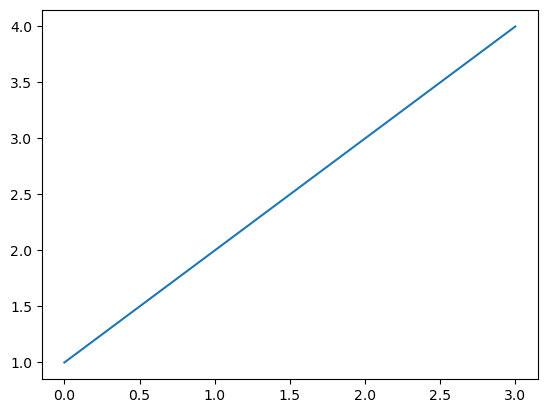

In [6]:
plt.plot([1,2,3,4]);
plt.show()

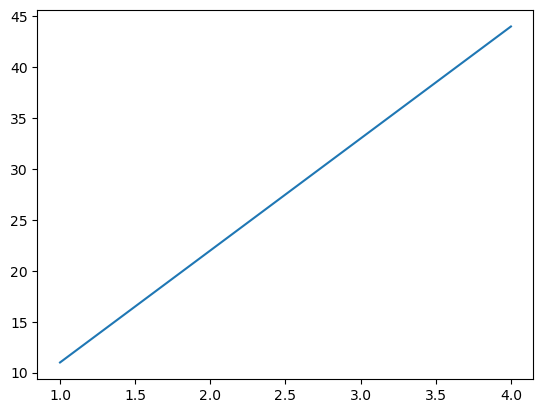

In [7]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y)
plt.show()

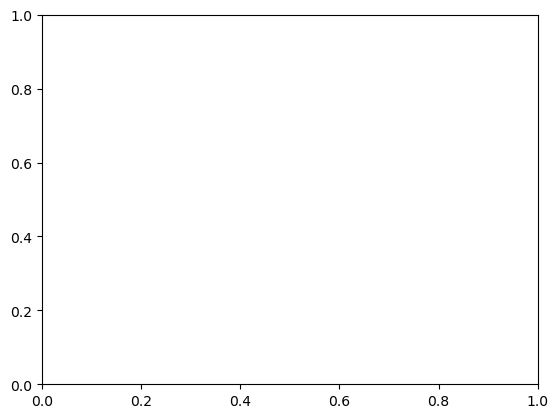

In [8]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

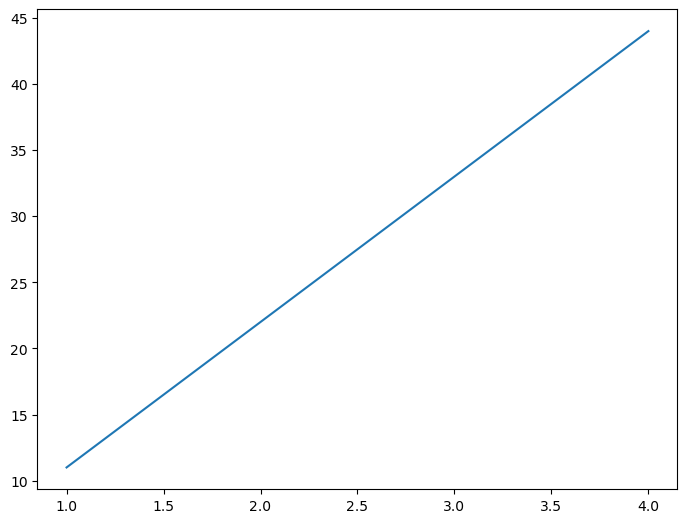

In [9]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x, y) # add some data
plt.show()

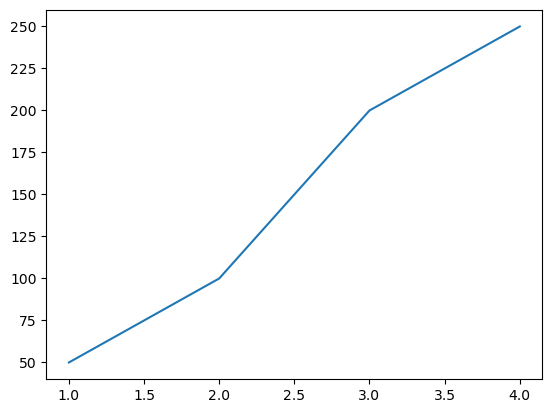

In [10]:
# 3rd methods (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]) #add some data
plt.show()

## Anatomy of a matplotlib plot

<img src="anatompy-of-matplotlib.png"/>

## Matplotlib example workflow

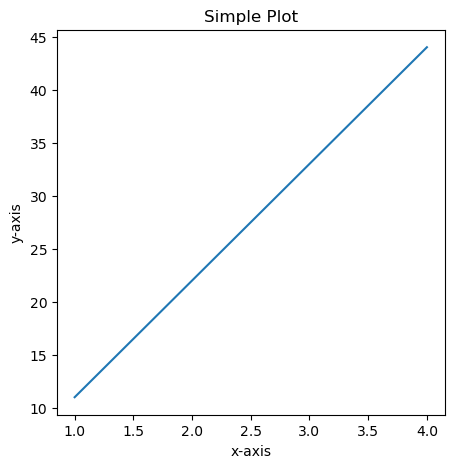

In [11]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Stup plot
fix, ax = plt.subplots(figsize=(5, 5)) # (width, height)

# 3. Plot the data
ax.plot(x, y)

#4. Customize plot
ax.set(title = "Simple Plot",
      xlabel = "x-axis",
      ylabel = "y-axis")

#5. Save & show (you save the whole figure)
fig.savefig("./images/sample-plot.png")
plt.show()

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Hist
* Histogram
* Subplots

In [12]:
import numpy as np

In [13]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

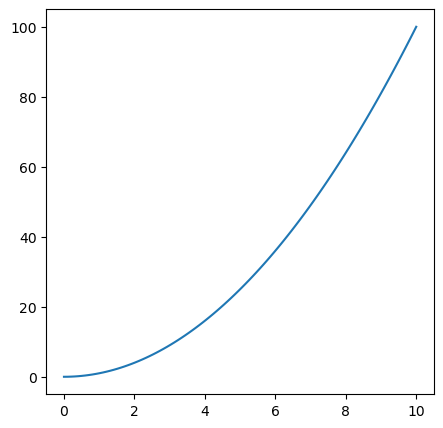

In [14]:
# Plot the data and create a line plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, x**2)
plt.show()

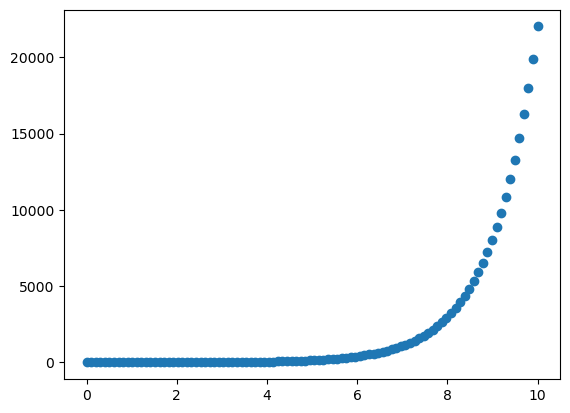

In [15]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))
plt.show()

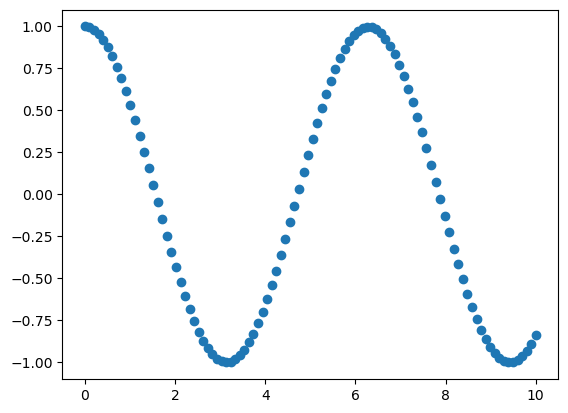

In [16]:
# Anoter scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.cos(x))
plt.show()

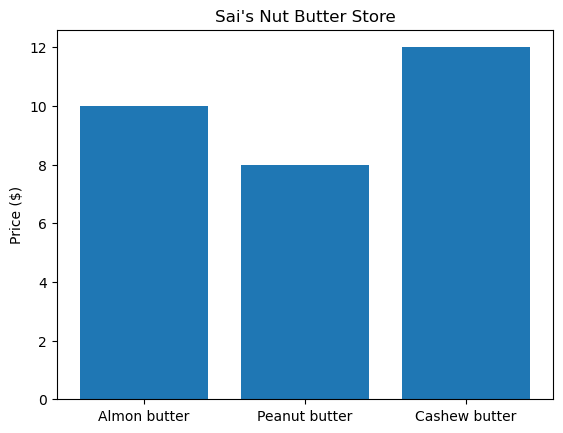

In [17]:
# Make a plot from dictionary
nut_butter_prices = {"Almon butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title = "Sai's Nut Butter Store",
      ylabel="Price ($)")
fig

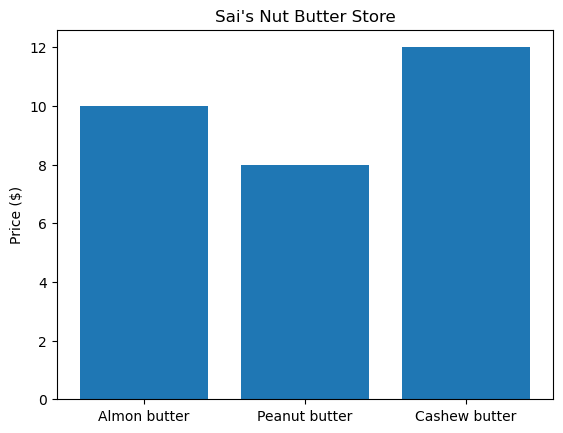

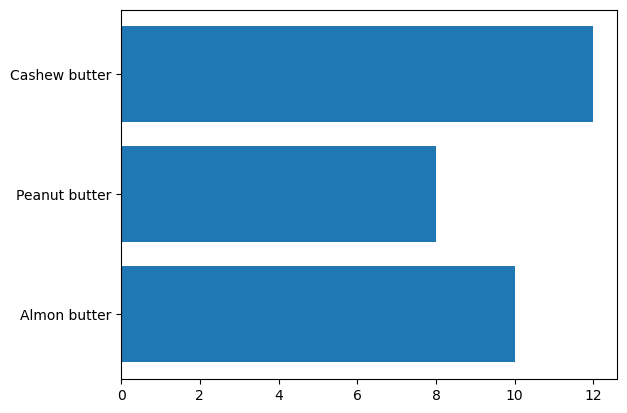

In [18]:
fig, ax = plt.subplots()
# For Horizontal bar grapth we have to convert them into list
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
plt.show()

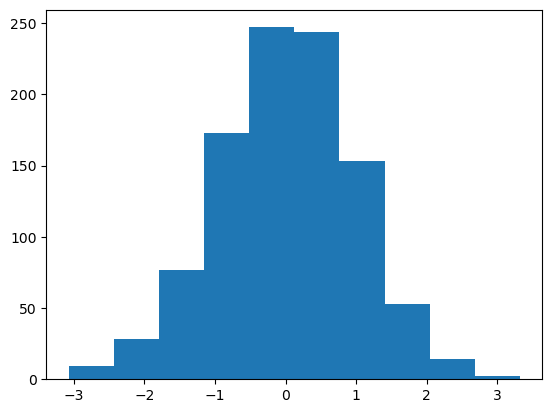

In [19]:
# Make Some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);
plt.show()

## Two options for subplots

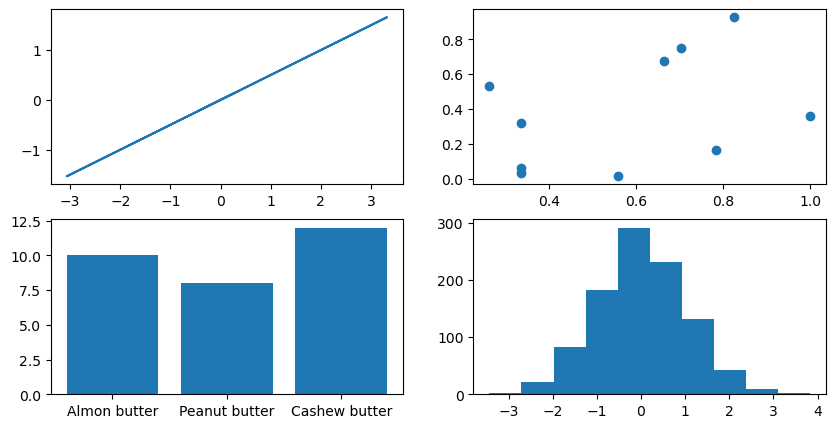

In [20]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000))

plt.show()

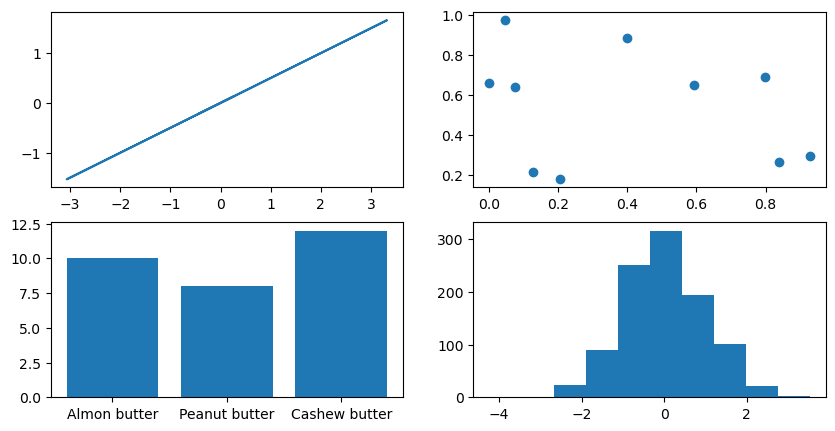

In [21]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000))
plt.show()

## Plotting from pandas DataFrames 

In [22]:
import pandas as pd

In [23]:
# Make a data frame
car_sales = pd.read_csv("../pandas-section/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


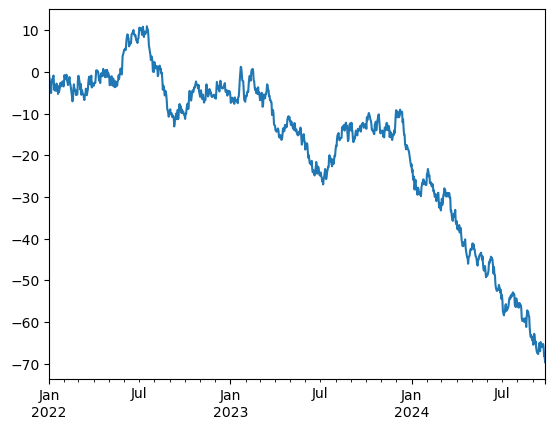

In [24]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2022", periods = 1000))
ts = ts.cumsum()
ts.plot()
plt.show()

In [25]:
car_sales["Price"] = car_sales["Price"].str.replace(r'[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [26]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["sale Date"] = pd.date_range("1/1/2022", periods= len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,sale Date
0,Toyota,White,150043,4,4000,2022-01-01
1,Honda,Red,87899,4,5000,2022-01-02
2,Toyota,Blue,32549,3,7000,2022-01-03
3,BMW,Black,11179,5,22000,2022-01-04
4,Nissan,White,213095,4,3500,2022-01-05
5,Toyota,Green,99213,4,4500,2022-01-06
6,Honda,Blue,45698,4,7500,2022-01-07
7,Honda,Blue,54738,4,7000,2022-01-08
8,Toyota,White,60000,4,6250,2022-01-09
9,Nissan,White,31600,4,9700,2022-01-10


In [28]:
car_sales.rename(columns = {"sale Date": "Sale Date"}, inplace = True)

In [29]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


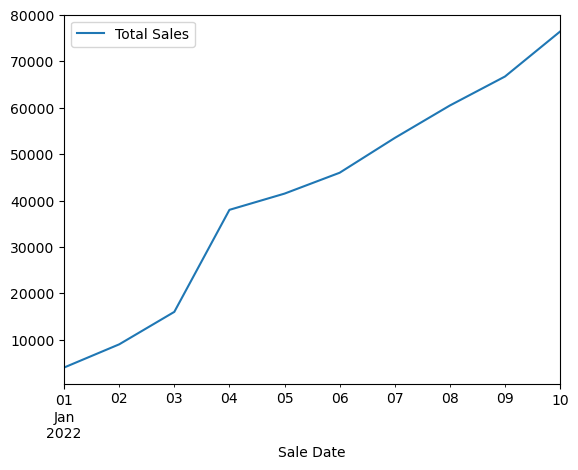

In [30]:
# Let's Plot the total sales
car_sales.plot(x = "Sale Date", y = "Total Sales")
plt.show()

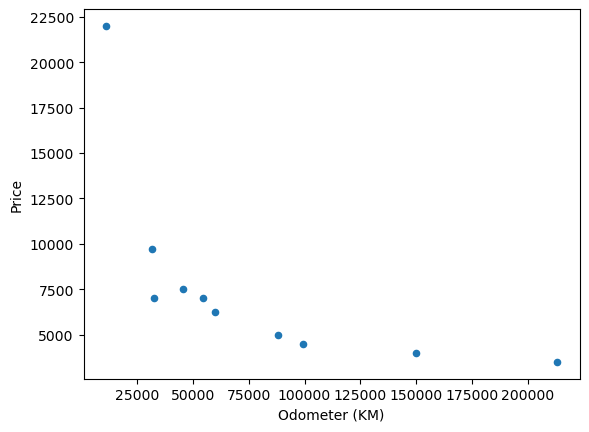

In [31]:
# Reassigning price column to integer
car_sales['Price'] = car_sales['Price'].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show()

In [32]:
# How about a bar graph?
x = np.random.rand(10, 4)
x

array([[0.14985052, 0.61579154, 0.49604066, 0.57187576],
       [0.50439385, 0.55645248, 0.49344451, 0.33423669],
       [0.18684082, 0.35446978, 0.43750562, 0.64930415],
       [0.91682867, 0.4633072 , 0.70698784, 0.10030447],
       [0.55300276, 0.19327422, 0.49470527, 0.60416636],
       [0.14470175, 0.43774196, 0.22983883, 0.61033697],
       [0.52906545, 0.61782506, 0.66483394, 0.72657455],
       [0.63751542, 0.98471268, 0.9548813 , 0.43550559],
       [0.75852382, 0.44813296, 0.58100978, 0.63641892],
       [0.93263981, 0.12755483, 0.0869038 , 0.01164927]])

In [33]:
# Turn it into a dataframe
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.149851,0.615792,0.496041,0.571876
1,0.504394,0.556452,0.493445,0.334237
2,0.186841,0.354470,0.437506,0.649304
3,0.916829,0.463307,0.706988,0.100304
4,0.553003,0.193274,0.494705,0.604166
5,0.144702,0.437742,0.229839,0.610337
6,0.529065,0.617825,0.664834,0.726575
7,0.637515,0.984713,0.954881,0.435506
8,0.758524,0.448133,0.581010,0.636419
9,0.932640,0.127555,0.086904,0.011649


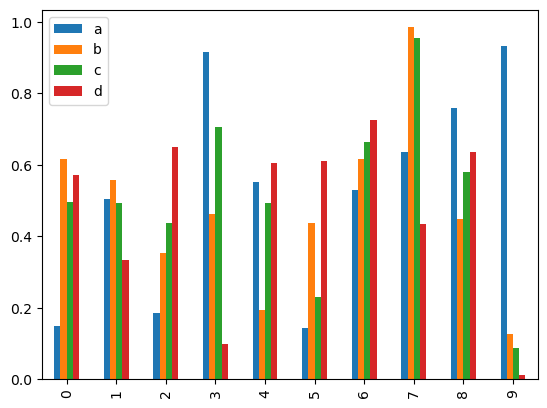

In [34]:
df.plot.bar()
plt.show()

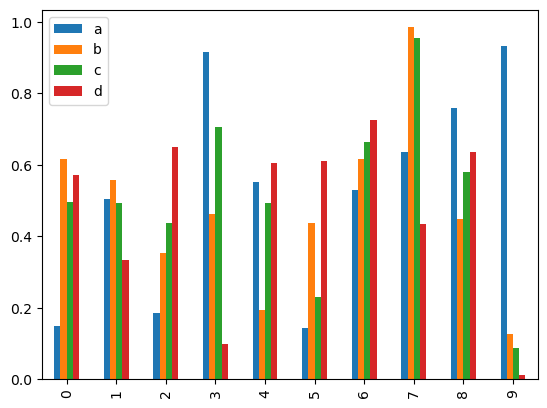

In [35]:
df.plot(kind = "bar")
plt.show()

In [36]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


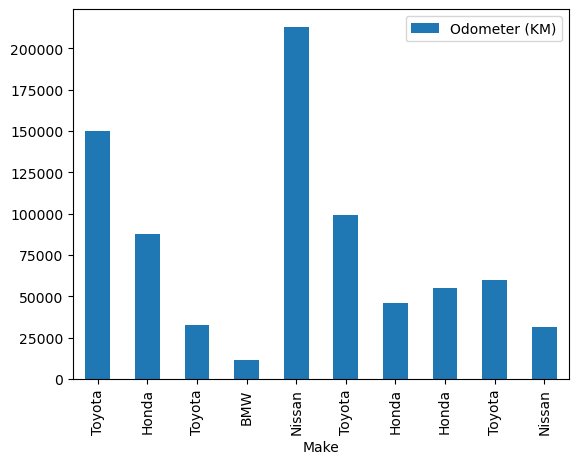

In [37]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")
plt.show()

In [38]:
# Try ploting average odometer reading for each different make

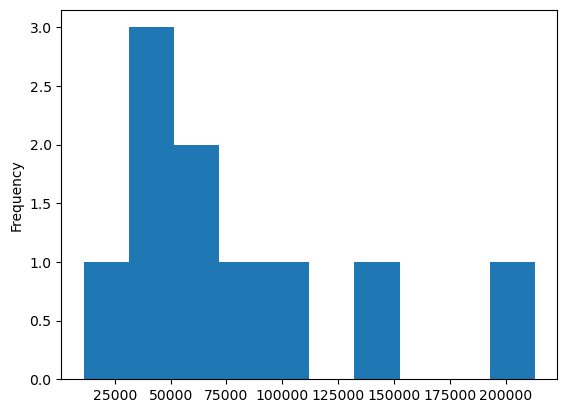

In [39]:
# How about histograms
car_sales['Odometer (KM)'].plot.hist()
plt.show()

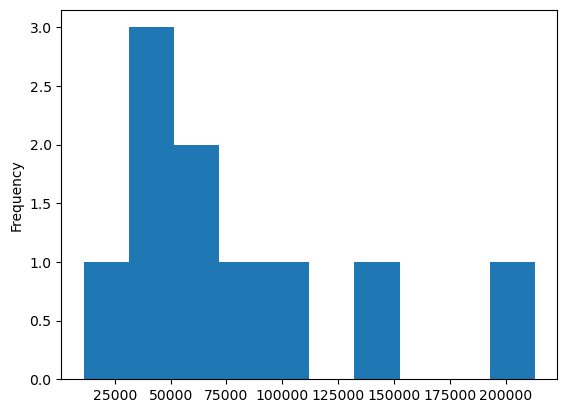

In [40]:
car_sales["Odometer (KM)"].plot(kind='hist')
plt.show()

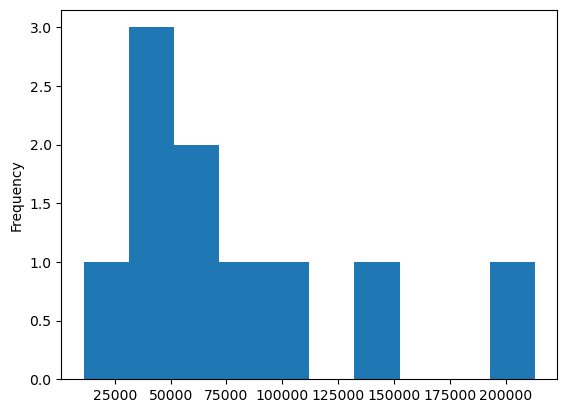

In [41]:
car_sales["Odometer (KM)"].plot.hist(bins = 10)
plt.show()

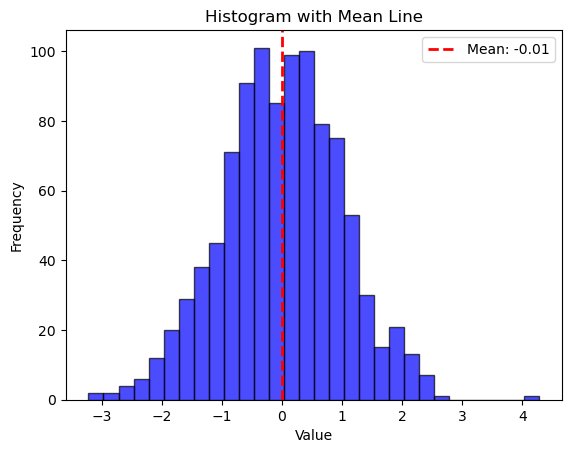

In [42]:
# Generated it by ChatGPT just for fun ;)

import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data = np.random.normal(0, 1, 1000)

# Plot the histogram
plt.hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')

# Calculate the mean (or use any value you want for the line)
mean_value = np.mean(data)

# Add a vertical line at the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add a legend to explain the line
plt.legend()

# Show the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Mean Line')
plt.show()


In [43]:
# Let's try another dataset
heart_disease_data = pd.read_csv("./heart-disese-data.csv")
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


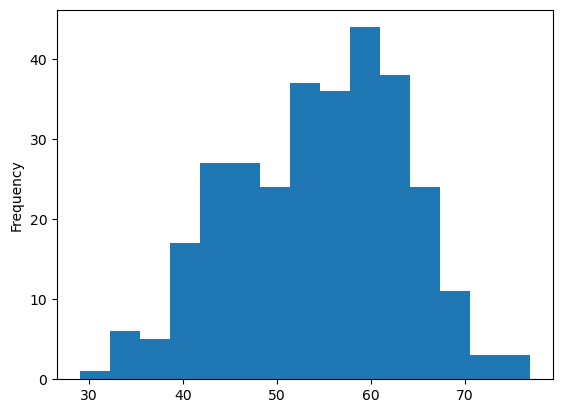

In [44]:
# Create a histogram of age
heart_disease_data['age'].plot.hist(bins = 15)
# In statistical terms it's more than 3 SD away from the mean - Outlier
plt.show()

In [45]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


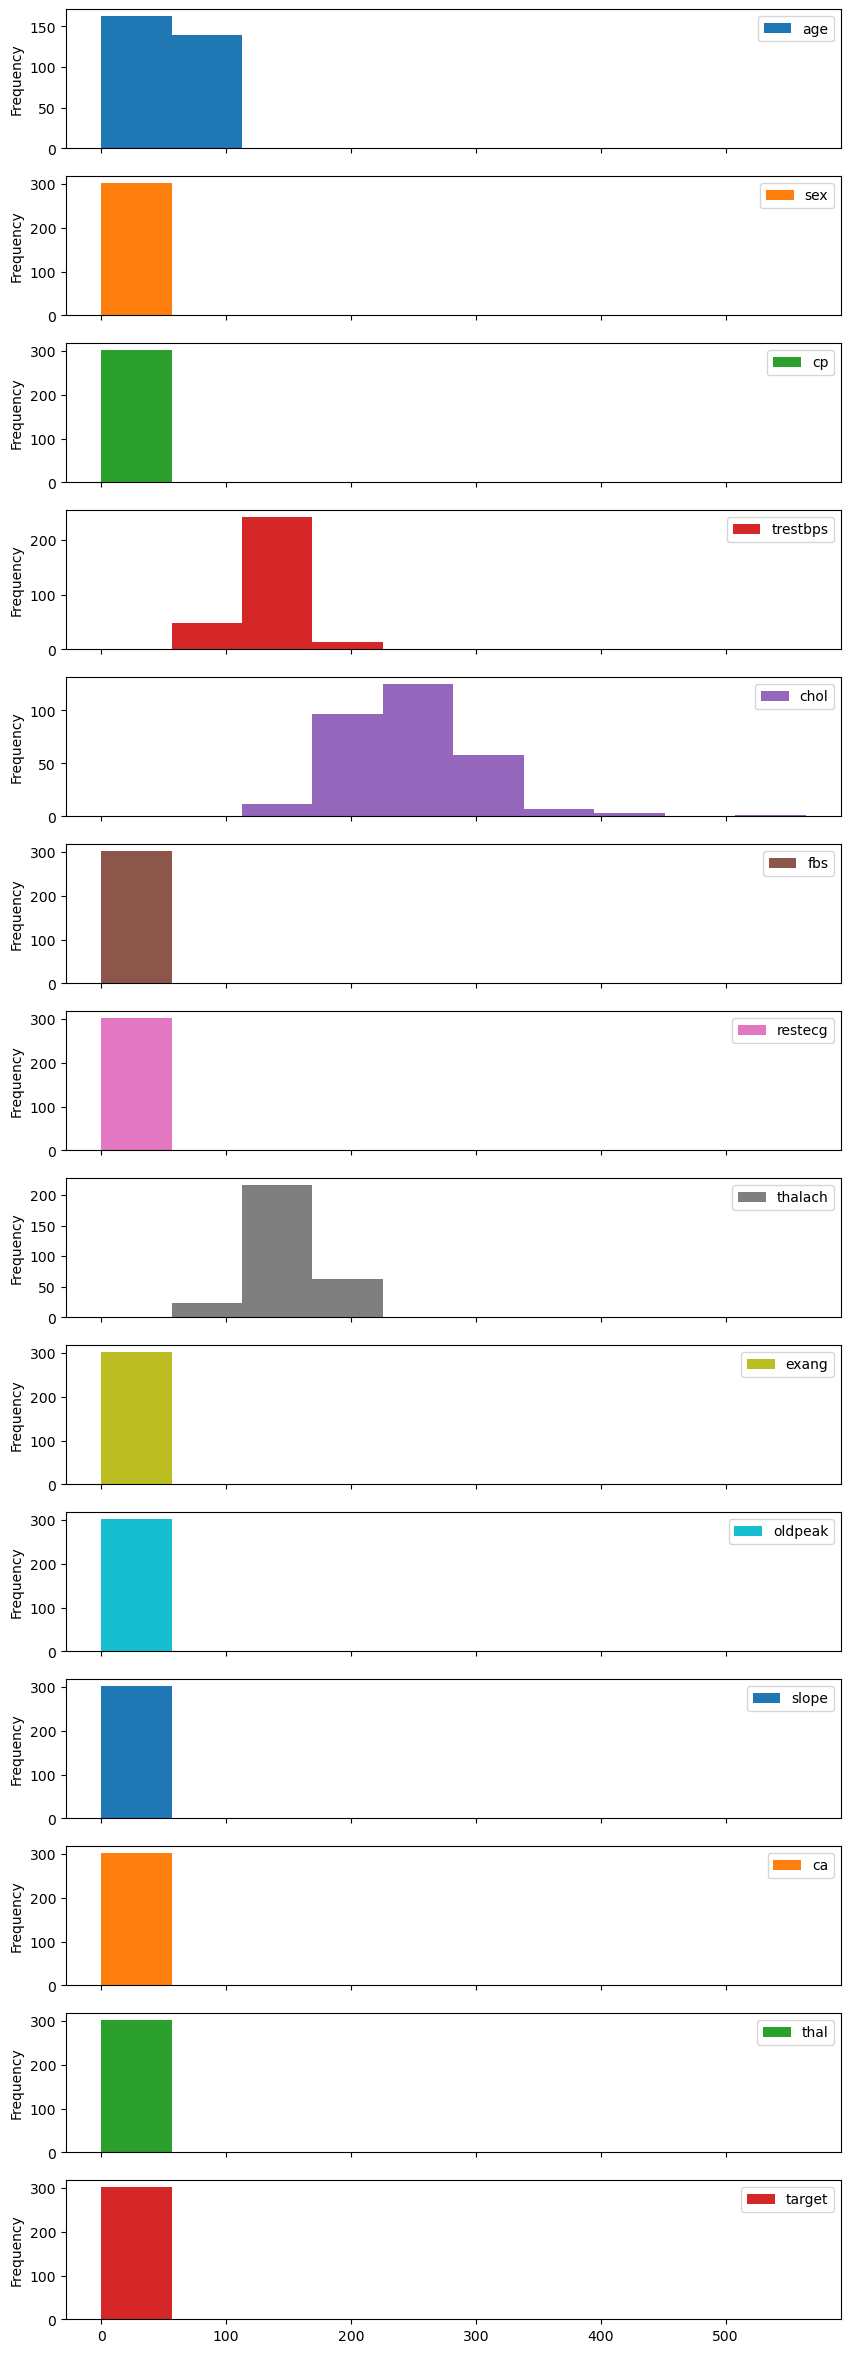

In [46]:
heart_disease_data.plot.hist(figsize = (10, 30), subplots=True)
plt.show()

### Which one should you use? (pyplot vs matplotlib OO Method ?)
* when plotting somenthing quickly, okay to use the pyplot method
* when plotting somenthing more advanced, use OO Method

In [47]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
over_50 = heart_disease_data[heart_disease_data['age'] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [49]:
len(over_50)

208

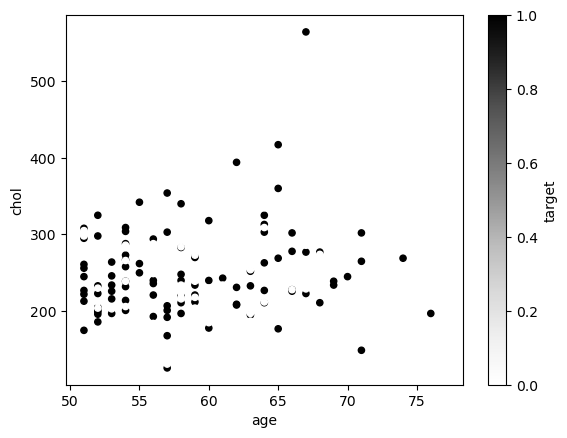

In [50]:
# Pyplot method
over_50.plot(kind='scatter',
            x = 'age',
            y = 'chol',
            c='target')
plt.show()

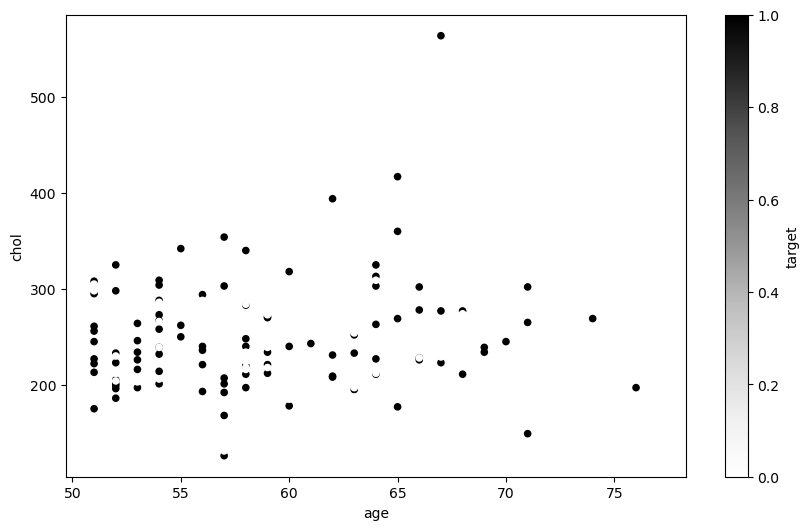

In [51]:
# OO method mixed with puplot method
fig, ax = plt.subplots(figsize = (10, 6))
over_50.plot(kind = 'scatter',
            x = 'age',
            y = 'chol',
            c = 'target',
            ax=ax)
# ax.set_xlim([45, 100])
plt.show()

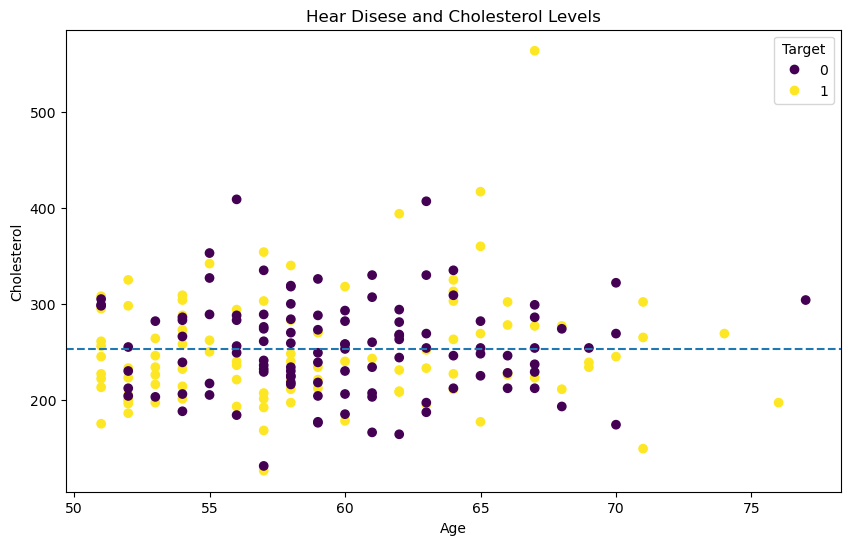

In [52]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                    c=over_50['target'])
#Customize the plot
ax.set(title = 'Hear Disese and Cholesterol Levels',
      xlabel = "Age",
      ylabel = "Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target")

# Adding a horizontal average line
ax.axhline(y = over_50['chol'].mean(), linestyle = '--' )
plt.show()

In [53]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


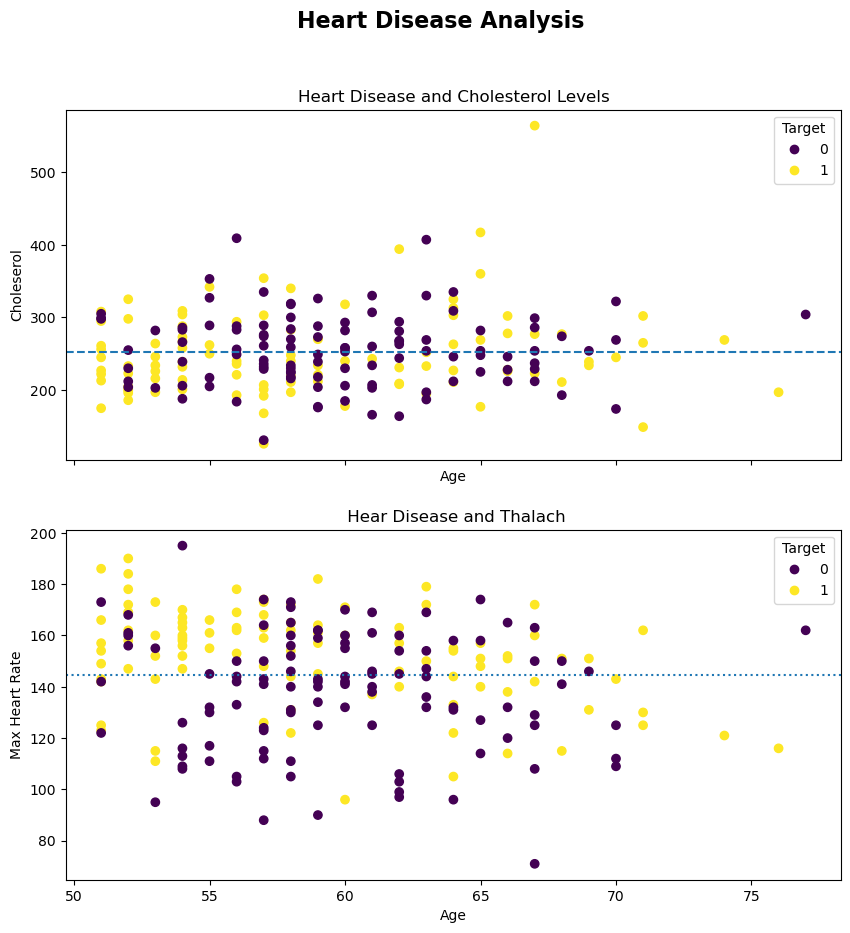

In [54]:
# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                              figsize=(10, 10),
                              sharex= True)

# Add data to ax0
scatter = ax0.scatter(x = over_50['age'], 
                     y = over_50['chol'],
                     c = over_50['target'])

# Customize ax0
ax0.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Choleserol")

#Adding legend to ax0
ax0.legend(*scatter.legend_elements(), title = "Target")

#Adding mean line to ax0
ax0.axhline(y = over_50['chol'].mean(),
           linestyle = "--" )

# Add data to ax1
scatter = ax1.scatter(x = over_50['age'],
                     y = over_50['thalach'],
                     c = over_50['target'])

#Customize ax1
ax1.set(title = " Hear Disease and Thalach", 
       xlabel = "Age",
       ylabel = "Max Heart Rate",)

#Adding Legend to ax1
ax1.legend(*scatter.legend_elements(), title= "Target")

#Adding mean line to ax1
ax1.axhline(y = over_50['thalach'].mean(),
           linestyle=':')

#Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");
plt.show()

## Customizing Matplotlib pots and getting stylish

In [55]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [56]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500


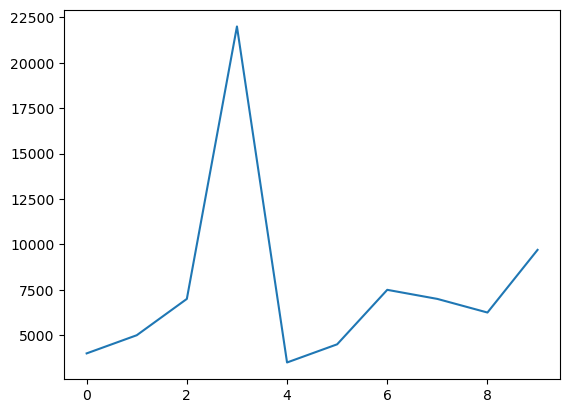

In [57]:
car_sales['Price'].plot();
plt.show()

In [58]:
plt.style.use('seaborn-v0_8-whitegrid')

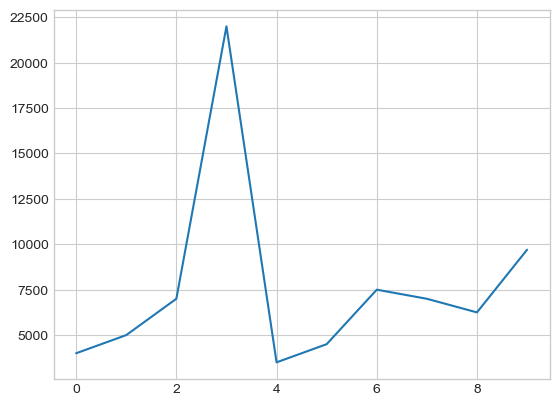

In [59]:
car_sales['Price'].plot();
plt.show()

In [60]:
plt.style.use('seaborn-v0_8')

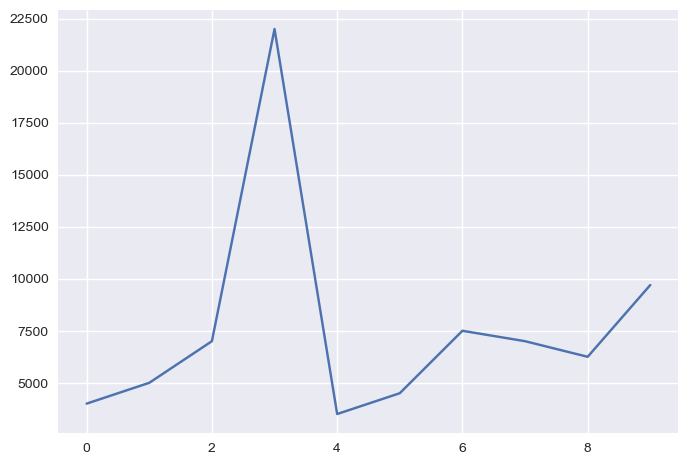

In [61]:
car_sales['Price'].plot();
plt.show()

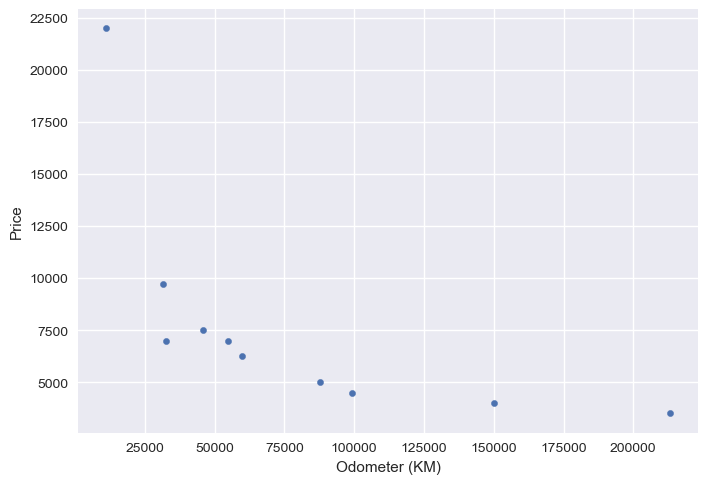

In [62]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");
plt.show()

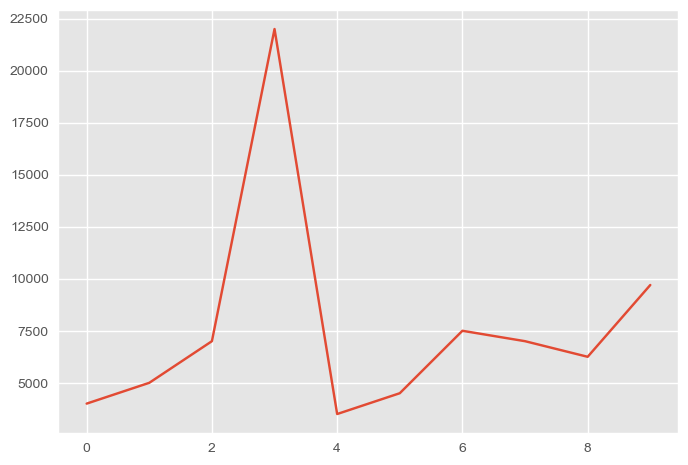

In [63]:
plt.style.use('ggplot')
car_sales['Price'].plot()
plt.show()

In [64]:
# Create some data
x = np.random.randn(10, 4)
x

array([[ 0.0053955 , -0.16793679, -0.55045276,  1.88921987],
       [ 1.08600137,  2.25201359, -0.75807139,  0.70801272],
       [-0.29661285, -0.0434874 ,  0.40264479, -0.24116906],
       [-1.49700325,  0.33985196,  0.90718033,  0.93964111],
       [ 2.03725925,  1.30664541, -0.02929703,  0.55278473],
       [-0.57417335,  0.36555782,  0.62943636,  0.43790056],
       [-0.43391045, -0.17700944,  0.3146545 ,  2.07141211],
       [-0.57349131, -0.20295155, -0.08453985, -0.19166552],
       [-0.38994138, -0.96740904, -1.08670225, -0.54891738],
       [-1.10601149, -0.94881263,  0.77442697,  0.58035453]])

In [65]:
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.005396,-0.167937,-0.550453,1.889220
1,1.086001,2.252014,-0.758071,0.708013
2,-0.296613,-0.043487,0.402645,-0.241169
3,-1.497003,0.339852,0.907180,0.939641
4,2.037259,1.306645,-0.029297,0.552785
5,-0.574173,0.365558,0.629436,0.437901
6,-0.433910,-0.177009,0.314655,2.071412
7,-0.573491,-0.202952,-0.084540,-0.191666
8,-0.389941,-0.967409,-1.086702,-0.548917
9,-1.106011,-0.948813,0.774427,0.580355


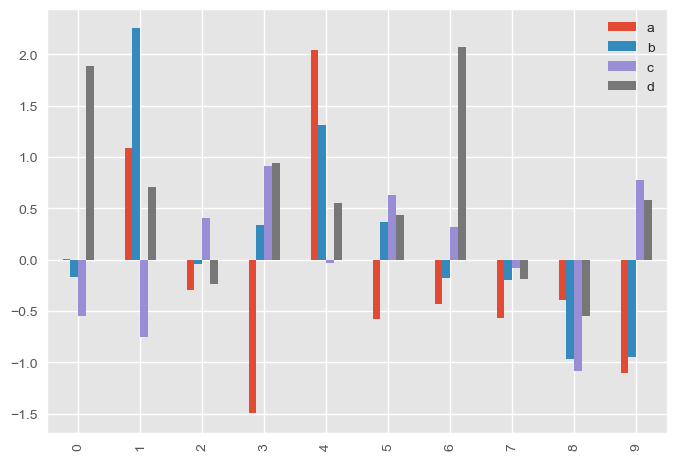

In [66]:
ax = df.plot(kind = 'bar')
plt.show()

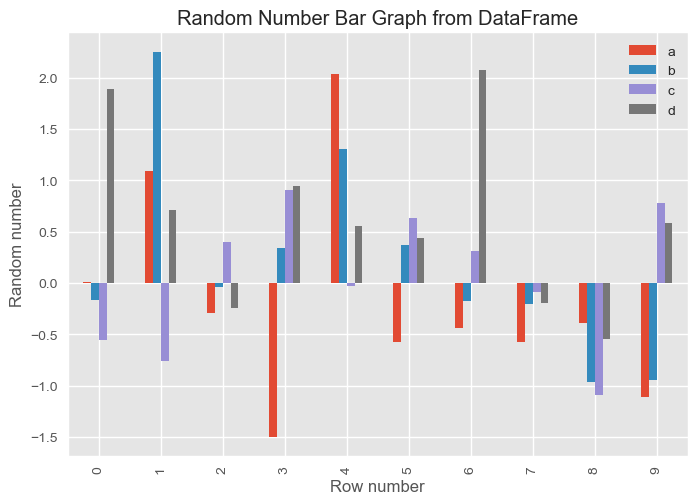

In [67]:
# Customize our plot with the set() method
ax = df.plot(kind = "bar")

# Add some labels and a title
ax.set(title = "Random Number Bar Graph from DataFrame",
      xlabel = "Row number",
      ylabel = "Random number")

#Make the legend visible
ax.legend().set_visible(True)

plt.show()

In [68]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

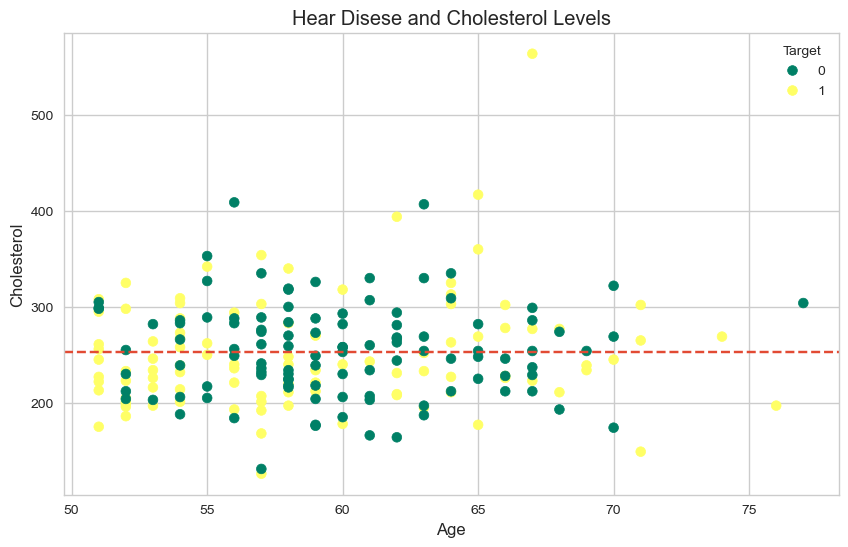

In [69]:
# Set the style 
plt.style.use('seaborn-v0_8-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                    c=over_50['target'],
                    cmap = "summer") # this changes the color scheme
#Customize the plot
ax.set(title = 'Hear Disese and Cholesterol Levels',
      xlabel = "Age",
      ylabel = "Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target")

# Adding a horizontal average line
ax.axhline(y = over_50['chol'].mean(), linestyle = '--' )
plt.show()

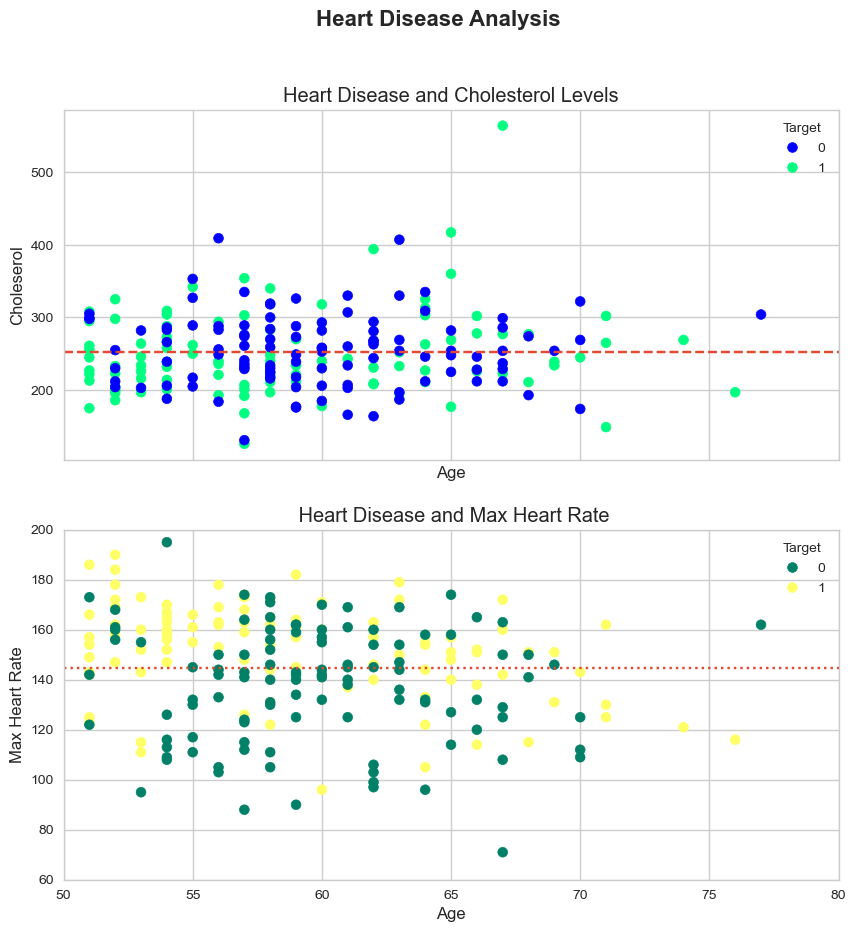

In [70]:
# Customizing the y and x axis limitations

# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                              figsize=(10, 10),
                              sharex= True)

# Add data to ax0
scatter = ax0.scatter(x = over_50['age'], 
                     y = over_50['chol'],
                     c = over_50['target'],
                     cmap='winter')

# Customize ax0
ax0.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "Age",
       ylabel = "Choleserol")

# Change the x axis limits
ax0.set_xlim([50, 80])

#Adding legend to ax0
ax0.legend(*scatter.legend_elements(), title = "Target")

#Adding mean line to ax0
ax0.axhline(y = over_50['chol'].mean(),
           linestyle = "--" )

# Add data to ax1
scatter = ax1.scatter(x = over_50['age'],
                     y = over_50['thalach'],
                     c = over_50['target'],
                     cmap='summer')

#Customize ax1
ax1.set(title = " Heart Disease and Max Heart Rate", 
       xlabel = "Age",
       ylabel = "Max Heart Rate",)

# Change ax1 y axis limits
ax1.set_ylim([60, 200])

#Adding Legend to ax1
ax1.legend(*scatter.legend_elements(), title= "Target")

#Adding mean line to ax1
ax1.axhline(y = over_50['thalach'].mean(),
           linestyle=':')

#Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");
plt.show()

In [71]:
# Saving the plot with help of code
fig.savefig("hear-disease-analysis-plot-saved-with-code.png")

In [72]:
ls

Matplotlib Exercises.ipynb
anatompy-of-matplotlib.png
hear-disease-analysis-plot-saved-with-code.png
heart-disese-data.csv
images/
introduction-to-matplotlib.ipynb
workflow.png
